## Importing libraries

In [1]:
## import all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [2]:
df.shape ## find the shape

(99999, 226)

In [3]:
df.describe() ## describe the data.

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
df.info() ## find the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.columns ## find all the columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
df.columns.tolist() ## list all the columns.

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
df.dtypes ## find the datatypes of the datacolumns.

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [8]:
# fixing date format
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6'])
df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7'])
df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8'])
df['last_date_of_month_9'] = pd.to_datetime(df['last_date_of_month_9'])
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'])
df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])
df['date_of_last_rech_data_9'] = pd.to_datetime(df['date_of_last_rech_data_9'])

In [9]:
# Derive new features using the dates
df['rech_before_lastday_6'] = (df['last_date_of_month_6'] - df['date_of_last_rech_6']).apply(lambda x: x.days)
df['rech_before_lastday_7'] = (df['last_date_of_month_7'] - df['date_of_last_rech_7']).apply(lambda x: x.days)
df['rech_before_lastday_8'] = (df['last_date_of_month_8'] - df['date_of_last_rech_8']).apply(lambda x: x.days)
df['rech_before_lastday_9'] = (df['last_date_of_month_9'] - df['date_of_last_rech_9']).apply(lambda x: x.days)

df['rechdata_before_lastday_6'] = (df['last_date_of_month_6'] - df['date_of_last_rech_data_6']).apply(lambda x: x.days)
df['rechdata_before_lastday_7'] = (df['last_date_of_month_7'] - df['date_of_last_rech_data_7']).apply(lambda x: x.days)
df['rechdata_before_lastday_8'] = (df['last_date_of_month_8'] - df['date_of_last_rech_data_8']).apply(lambda x: x.days)
df['rechdata_before_lastday_9'] = (df['last_date_of_month_9'] - df['date_of_last_rech_data_9']).apply(lambda x: x.days)

In [10]:
# finding null values
print(df.isnull().sum(axis=0).sort_values(ascending=False))

max_rech_data_6              74846
arpu_3g_6                    74846
date_of_last_rech_data_6     74846
arpu_2g_6                    74846
rechdata_before_lastday_6    74846
                             ...  
last_day_rch_amt_6               0
circle_id                        0
last_day_rch_amt_9               0
last_day_rch_amt_8               0
mobile_number                    0
Length: 234, dtype: int64


In [11]:
null_value_percent=df.isnull().sum()*100/len(df)  ## calculate the percentage of null values.
null_value_percent 

mobile_number                 0.000000
circle_id                     0.000000
loc_og_t2o_mou                1.018010
std_og_t2o_mou                1.018010
loc_ic_t2o_mou                1.018010
                               ...    
rech_before_lastday_9         4.760048
rechdata_before_lastday_6    74.846748
rechdata_before_lastday_7    74.428744
rechdata_before_lastday_8    73.660737
rechdata_before_lastday_9    74.077741
Length: 234, dtype: float64

In [12]:
high_null_value_columns=null_value_percent[null_value_percent>=40] ## calculate the >40% null value columns.
high_null_value_columns

date_of_last_rech_data_6     74.846748
date_of_last_rech_data_7     74.428744
date_of_last_rech_data_8     73.660737
date_of_last_rech_data_9     74.077741
total_rech_data_6            74.846748
total_rech_data_7            74.428744
total_rech_data_8            73.660737
total_rech_data_9            74.077741
max_rech_data_6              74.846748
max_rech_data_7              74.428744
max_rech_data_8              73.660737
max_rech_data_9              74.077741
count_rech_2g_6              74.846748
count_rech_2g_7              74.428744
count_rech_2g_8              73.660737
count_rech_2g_9              74.077741
count_rech_3g_6              74.846748
count_rech_3g_7              74.428744
count_rech_3g_8              73.660737
count_rech_3g_9              74.077741
av_rech_amt_data_6           74.846748
av_rech_amt_data_7           74.428744
av_rech_amt_data_8           73.660737
av_rech_amt_data_9           74.077741
arpu_3g_6                    74.846748
arpu_3g_7                

In [13]:
df1=df.drop(columns=high_null_value_columns.index) ##  drop the columns having high null values.
df1 ## new dataset

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_before_lastday_6,rech_before_lastday_7,rech_before_lastday_8,rech_before_lastday_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,0,968,30.40,0.00,101.20,3.58,9.0,15.0,23.0,2.0
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0,1006,0.00,0.00,0.00,0.00,1.0,0.0,3.0,0.0
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,0,1103,0.00,0.00,4.17,0.00,13.0,7.0,17.0,1.0
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0,2491,0.00,0.00,0.00,0.00,2.0,0.0,0.0,0.0
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0,1526,0.00,0.00,0.00,0.00,4.0,3.0,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,18.471,...,0,3199,0.00,0.00,0.00,0.00,27.0,11.0,5.0,5.0
99995,7000607688,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,112.201,...,0,2052,0.00,0.00,0.00,0.00,13.0,14.0,7.0,4.0
99996,7000087541,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,229.187,...,0,185,0.00,0.00,0.00,0.00,17.0,5.0,NaN,28.0
99997,7000498689,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,322.991,...,0,478,1445.74,1151.03,1173.18,0.00,13.0,12.0,11.0,13.0


In [14]:
null_value_percent1=(df1.isnull().sum() / len(df1) * 100).sort_values(ascending=False)
null_value_percent1

loc_ic_t2f_mou_9      7.745077
offnet_mou_9          7.745077
roam_ic_mou_9         7.745077
loc_ic_mou_9          7.745077
roam_og_mou_9         7.745077
                        ...   
max_rech_amt_9        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
mobile_number         0.000000
Length: 190, dtype: float64

In [15]:
df1.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

#### Assuming 6&7 months customers are happy thus naming it as "good" months and 8th month customer takes action so naming it as "action" month and month 9 as churn month


In [16]:
# null values are within limit
# Identify the high value customers. Any customers who have recharged more than or equal to 70 perctile of the grand recharge average of good months ( month 6 and 7)
df1['avg_good_month_rech_amt'] = (df1['total_rech_amt_6'] + df1['total_rech_amt_7']) / 2
df1['high_value_cust'] = np.where(df1['avg_good_month_rech_amt'] > np.percentile(df1['avg_good_month_rech_amt'], 70), 'Y', 'N')

print('70th percentile of the grand average of good months: ' + str(np.percentile(df1['avg_good_month_rech_amt'], 70)) + '\n')



70th percentile of the grand average of good months: 368.5



In [17]:
# Count of High Value Customers
print('High value Customers: ',"\n", df1.groupby(['high_value_cust'])['mobile_number'].count(),"\n")

# Copy the High Value customers
hv_df1 = df1[df1['high_value_cust'] == 'Y']


High value Customers:  
 high_value_cust
N    70020
Y    29979
Name: mobile_number, dtype: int64 



In [18]:
# Churn customers in high value customers
hv_df1['churn']=np.where(((hv_df1['total_ic_mou_9']==0) & 
                             (hv_df1['total_og_mou_9']==0) &
                             (hv_df1['vol_2g_mb_9']==0) & 
                             (hv_df1['vol_3g_mb_9']==0)),1,0)


print('Churn Customers in High Value Customers',"\n", hv_df1[hv_df1['high_value_cust']=='Y'].groupby(['churn'])['mobile_number'].count())


Churn Customers in High Value Customers 
 churn
0    27390
1     2589
Name: mobile_number, dtype: int64


In [19]:
# Drop the columns related to churn month (september)
import re
cols=hv_df1.columns
churn_reg=re.compile(r'.*_9')
churn_cols=list(filter(churn_reg.match,cols))
churn_cols=churn_cols+['sep_vbc_3g']
hv_df1.drop(columns=churn_cols,axis=1,inplace=True)

In [20]:
#Rename month 8 columns to 'active' for easy identification
hv_df1.columns=hv_df1.columns.str.replace('_8+','_active')

In [21]:
hv_df1.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_active',
 'arpu_6',
 'arpu_7',
 'arpu_active',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_active',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_active',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_active',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_active',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_active',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_active',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_active',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_active',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_active',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_active',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_active',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_active',
 'std_og_t2c_mou_6',
 'std_og_t2c_

# Feature Engineering

In [22]:
#lets combine some relevant info of 6 and 7 month to good month and drop the original data
hv_df1['arpu_good'] = (hv_df1['arpu_6'] + hv_df1['arpu_7']) / 2
hv_df1['onnet_mou_good'] = (hv_df1['onnet_mou_6'] + hv_df1['onnet_mou_7']) / 2
hv_df1['offnet_mou_good'] = (hv_df1['offnet_mou_6'] + hv_df1['offnet_mou_7']) / 2
hv_df1['roam_ic_mou_good'] = (hv_df1['roam_ic_mou_6'] + hv_df1['roam_ic_mou_7']) / 2
hv_df1['roam_og_mou_good'] = (hv_df1['roam_og_mou_6'] + hv_df1['roam_og_mou_7']) / 2
hv_df1['loc_og_t2t_mou_good'] = (hv_df1['loc_og_t2t_mou_6'] + hv_df1['loc_og_t2t_mou_7']) / 2
hv_df1['loc_og_t2m_mou_good'] = (hv_df1['loc_og_t2m_mou_6'] + hv_df1['loc_og_t2m_mou_7']) / 2
hv_df1['loc_og_t2f_mou_good'] = (hv_df1['loc_og_t2f_mou_6'] + hv_df1['loc_og_t2f_mou_7']) / 2
hv_df1['loc_og_t2c_mou_good'] = (hv_df1['loc_og_t2c_mou_6'] + hv_df1['loc_og_t2c_mou_7']) / 2
hv_df1['loc_og_mou_good'] = (hv_df1['loc_og_mou_6'] + hv_df1['loc_og_mou_7']) / 2
hv_df1['std_og_t2t_mou_good'] = (hv_df1['std_og_t2t_mou_6'] + hv_df1['std_og_t2t_mou_7']) / 2
hv_df1['std_og_t2m_mou_good'] = (hv_df1['std_og_t2m_mou_6'] + hv_df1['std_og_t2m_mou_7']) / 2
hv_df1['std_og_t2f_mou_good'] = (hv_df1['std_og_t2f_mou_6'] + hv_df1['std_og_t2f_mou_7']) / 2
hv_df1['std_og_t2c_mou_good'] = (hv_df1['std_og_t2c_mou_6'] + hv_df1['std_og_t2c_mou_7']) / 2
hv_df1['std_og_mou_good'] = (hv_df1['std_og_mou_6'] + hv_df1['std_og_mou_7']) / 2
hv_df1['isd_og_mou_good'] = (hv_df1['isd_og_mou_6'] + hv_df1['isd_og_mou_7']) / 2
hv_df1['spl_og_mou_good'] = (hv_df1['spl_og_mou_6'] + hv_df1['spl_og_mou_7']) / 2
hv_df1['og_others_good'] = (hv_df1['og_others_6'] + hv_df1['og_others_7']) / 2
hv_df1['total_og_mou_good'] = (hv_df1['total_og_mou_6'] + hv_df1['total_og_mou_7']) / 2
hv_df1['loc_ic_t2t_mou_good'] = (hv_df1['loc_ic_t2t_mou_6'] + hv_df1['loc_ic_t2t_mou_7']) / 2
hv_df1['loc_ic_t2m_mou_good'] = (hv_df1['loc_ic_t2m_mou_6'] + hv_df1['loc_ic_t2m_mou_7']) / 2
hv_df1['loc_ic_t2f_mou_good'] = (hv_df1['loc_ic_t2f_mou_6'] + hv_df1['loc_ic_t2f_mou_7']) / 2
hv_df1['loc_ic_mou_good'] = (hv_df1['loc_ic_mou_6'] + hv_df1['loc_ic_mou_7']) / 2
hv_df1['std_ic_t2t_mou_good'] = (hv_df1['std_ic_t2t_mou_6'] + hv_df1['std_ic_t2t_mou_7']) / 2
hv_df1['std_ic_t2m_mou_good'] = (hv_df1['std_ic_t2m_mou_6'] + hv_df1['std_ic_t2m_mou_7']) / 2
hv_df1['std_ic_t2f_mou_good'] = (hv_df1['std_ic_t2f_mou_6'] + hv_df1['std_ic_t2f_mou_7']) / 2
hv_df1['std_ic_t2o_mou_good'] = (hv_df1['std_ic_t2o_mou_6'] + hv_df1['std_ic_t2o_mou_7']) / 2
hv_df1['std_ic_mou_good'] = (hv_df1['std_ic_mou_6'] + hv_df1['std_ic_mou_7']) / 2
hv_df1['total_ic_mou_good'] = (hv_df1['total_ic_mou_6'] + hv_df1['total_ic_mou_7']) / 2
hv_df1['spl_ic_mou_good'] = (hv_df1['spl_ic_mou_6'] + hv_df1['spl_ic_mou_7']) / 2
hv_df1['isd_ic_mou_good'] = (hv_df1['isd_ic_mou_6'] + hv_df1['isd_ic_mou_7']) / 2
hv_df1['ic_others_good'] = (hv_df1['ic_others_6'] + hv_df1['ic_others_7']) / 2
hv_df1['total_rech_num_good'] = (hv_df1['total_rech_num_6'] + hv_df1['total_rech_num_7']) / 2
hv_df1['total_rech_amt_good'] = (hv_df1['total_rech_amt_6'] + hv_df1['total_rech_amt_7']) / 2
hv_df1['max_rech_amt_good'] = (hv_df1['max_rech_amt_6'] + hv_df1['max_rech_amt_7']) / 2
hv_df1['last_day_rch_amt_good'] = (hv_df1['last_day_rch_amt_6'] + hv_df1['last_day_rch_amt_7']) / 2
hv_df1['vol_2g_mb_good'] = (hv_df1['vol_2g_mb_6'] + hv_df1['vol_2g_mb_7']) / 2
hv_df1['vol_3g_mb_good'] = (hv_df1['vol_3g_mb_6'] + hv_df1['vol_3g_mb_7']) / 2
hv_df1['monthly_2g_good'] = (hv_df1['monthly_2g_6'] + hv_df1['monthly_2g_7']) / 2
hv_df1['sachet_2g_good'] = (hv_df1['sachet_2g_6'] + hv_df1['sachet_2g_7']) / 2
hv_df1['monthly_3g_good'] = (hv_df1['monthly_3g_6'] + hv_df1['monthly_3g_7']) / 2
hv_df1['sachet_3g_good'] = (hv_df1['sachet_3g_6'] + hv_df1['sachet_3g_7']) / 2
hv_df1['aug_vbc_3g_good'] = (hv_df1['aug_vbc_3g'] + hv_df1['jul_vbc_3g']) / 2
hv_df1['jun_vbc_3g_good'] = (hv_df1['jun_vbc_3g'] + hv_df1['rech_before_lastday_6']) / 2
hv_df1['rech_before_lastday_good'] = (hv_df1['rech_before_lastday_6'] + hv_df1['rech_before_lastday_7']) / 2


In [23]:
# Drop original '6' and '7' columns
hv_df1.drop(columns=[
    'last_date_of_month_6', 'last_date_of_month_7',
    'arpu_6', 'arpu_7',
    'onnet_mou_6', 'onnet_mou_7',
    'offnet_mou_6', 'offnet_mou_7',
    'roam_ic_mou_6', 'roam_ic_mou_7',
    'roam_og_mou_6', 'roam_og_mou_7',
    'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
    'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
    'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
    'loc_og_mou_6', 'loc_og_mou_7',
    'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
    'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
    'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
    'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
    'std_og_mou_6', 'std_og_mou_7',
    'isd_og_mou_6', 'isd_og_mou_7',
    'spl_og_mou_6', 'spl_og_mou_7',
    'og_others_6', 'og_others_7',
    'total_og_mou_6', 'total_og_mou_7',
    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
    'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
    'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
    'loc_ic_mou_6', 'loc_ic_mou_7',
    'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
    'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
    'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
    'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
    'std_ic_mou_6', 'std_ic_mou_7',
    'total_ic_mou_6', 'total_ic_mou_7',
    'spl_ic_mou_6', 'spl_ic_mou_7',
    'isd_ic_mou_6', 'isd_ic_mou_7',
    'ic_others_6', 'ic_others_7',
    'total_rech_num_6', 'total_rech_num_7',
    'total_rech_amt_6', 'total_rech_amt_7',
    'max_rech_amt_6', 'max_rech_amt_7',
    'date_of_last_rech_6', 'date_of_last_rech_7',
    'last_day_rch_amt_6', 'last_day_rch_amt_7',
    'vol_2g_mb_6', 'vol_2g_mb_7',
    'vol_3g_mb_6', 'vol_3g_mb_7',
    'monthly_2g_6', 'monthly_2g_7',
    'sachet_2g_6', 'sachet_2g_7',
    'monthly_3g_6', 'monthly_3g_7',
    'sachet_3g_6', 'sachet_3g_7',
    'aug_vbc_3g', 'jun_vbc_3g',
    'rech_before_lastday_6', 'rech_before_lastday_7'
], inplace=True)

In [24]:
hv_df1.isnull().mean() * 100

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.380266
std_og_t2o_mou              0.380266
loc_ic_t2o_mou              0.380266
                              ...   
monthly_3g_good             0.000000
sachet_3g_good              0.000000
aug_vbc_3g_good             0.000000
jun_vbc_3g_good             0.206811
rech_before_lastday_good    0.587078
Length: 100, dtype: float64

In [25]:
columns_with_null = hv_df1.columns[hv_df1.isnull().mean() > 0]
hv_df1 = hv_df1.dropna(subset=columns_with_null)

# Check if there are any remaining null values
hv_df1.isnull().sum()


mobile_number               0
circle_id                   0
loc_og_t2o_mou              0
std_og_t2o_mou              0
loc_ic_t2o_mou              0
                           ..
monthly_3g_good             0
sachet_3g_good              0
aug_vbc_3g_good             0
jun_vbc_3g_good             0
rech_before_lastday_good    0
Length: 100, dtype: int64

In [26]:
# keeping a copy for future reference
hv_df2=hv_df1.copy()
hv_df2.shape

(28455, 100)

In [27]:
# lets check the correlation between these variables and drop highly correlated variables
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
corr = hv_df1.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr = corr[(corr > 0.60) | (corr < -0.60)]
high_corr

loc_og_mou_active        loc_og_t2t_mou_active      0.768968
                         loc_og_t2m_mou_active      0.766655
std_og_t2t_mou_active    onnet_mou_active           0.853651
std_og_t2m_mou_active    offnet_mou_active          0.846743
std_og_mou_active        onnet_mou_active           0.615737
                         std_og_t2t_mou_active      0.739207
                         std_og_t2m_mou_active      0.746514
total_og_mou_active      onnet_mou_active           0.714708
                         offnet_mou_active          0.714504
                         std_og_t2t_mou_active      0.609691
                         std_og_t2m_mou_active      0.636516
                         std_og_mou_active          0.839277
loc_ic_mou_active        loc_ic_t2t_mou_active      0.676779
                         loc_ic_t2m_mou_active      0.850255
std_ic_mou_active        std_ic_t2t_mou_active      0.652782
                         std_ic_t2m_mou_active      0.846898
total_ic_mou_active     

In [28]:
# Drop high correlated variables from the DataFrame
repeated_variables = [
    'onnet_mou_active', 'offnet_mou_active', 'std_og_t2t_mou_active', 'std_og_t2m_mou_active', 
    'std_og_mou_active', 'total_og_mou_active', 'loc_ic_t2t_mou_active', 'loc_ic_t2m_mou_active', 
    'loc_ic_mou_active', 'std_ic_t2t_mou_active', 'std_ic_t2m_mou_active', 'std_ic_mou_active', 
    'loc_ic_t2m_mou_active', 'loc_ic_mou_active', 'total_ic_mou_active', 'loc_ic_t2t_mou_good', 
    'loc_ic_t2m_mou_good', 'loc_ic_mou_good', 'std_ic_t2t_mou_good', 'std_ic_t2m_mou_good', 
    'std_ic_mou_good', 'total_ic_mou_good'
]


hv_df1.drop(columns=repeated_variables, inplace=True)

In [29]:
#checking once again
corr1 = hv_df1.corr()
corr1.loc[:, :] = np.tril(corr1, -1)
corr1 = corr1.stack()
high_corr1 = corr1[(corr1 > 0.60) | (corr1 < -0.60)]
high_corr1

loc_og_mou_active        loc_og_t2t_mou_active      0.768968
                         loc_og_t2m_mou_active      0.766655
total_rech_amt_active    arpu_active                0.959858
last_day_rch_amt_active  max_rech_amt_active        0.681403
monthly_3g_active        vol_3g_mb_active           0.674636
avg_good_month_rech_amt  arpu_active                0.763659
                         total_rech_amt_active      0.741995
arpu_good                arpu_active                0.761400
                         total_rech_amt_active      0.751010
                         avg_good_month_rech_amt    0.979254
roam_og_mou_good         roam_ic_mou_good           0.635585
loc_og_t2t_mou_good      loc_og_t2t_mou_active      0.814033
                         loc_og_mou_active          0.629273
loc_og_t2m_mou_good      loc_og_t2m_mou_active      0.794624
                         loc_og_mou_active          0.628903
loc_og_t2f_mou_good      loc_og_t2f_mou_active      0.762969
loc_og_mou_good         

In [30]:
repeated_variables1 = [
    'loc_og_mou_active', 'loc_og_t2t_mou_active', 'loc_og_t2m_mou_active', 'total_rech_amt_active',
    'arpu_active', 'avg_good_month_rech_amt', 'arpu_good', 'loc_og_t2t_mou_good', 'loc_og_mou_active',
    'loc_og_t2m_mou_good', 'loc_og_t2f_mou_active', 'loc_og_mou_good', 'std_og_t2t_mou_good', 'onnet_mou_good',
    'std_og_t2m_mou_good', 'offnet_mou_good', 'std_og_mou_good', 'total_og_mou_good', 'loc_ic_t2f_mou_active',
    'std_ic_t2f_mou_active', 'isd_ic_mou_active', 'ic_others_active', 'total_rech_num_active', 'total_rech_amt_good',
    'max_rech_amt_active'
]

hv_df1.drop(columns=repeated_variables1, inplace=True)

In [31]:
# checking the high correlated variables again
corr2 = hv_df1.corr()
corr2.loc[:, :] = np.tril(corr2, -1)
corr2 = corr2.stack()
high_corr2 = corr2[(corr2 > 0.60) | (corr2 < -0.60)]
high_corr2

monthly_3g_active      vol_3g_mb_active         0.674636
roam_og_mou_good       roam_ic_mou_good         0.635585
std_og_t2f_mou_good    std_og_t2f_mou_active    0.760306
isd_og_mou_good        isd_og_mou_active        0.963890
last_day_rch_amt_good  max_rech_amt_good        0.672388
vol_2g_mb_good         vol_2g_mb_active         0.657963
vol_3g_mb_good         vol_3g_mb_active         0.755322
                       jul_vbc_3g               0.635882
monthly_2g_good        monthly_2g_active        0.608642
sachet_2g_good         sachet_2g_active         0.675644
monthly_3g_good        monthly_3g_active        0.699869
                       vol_3g_mb_good           0.698427
sachet_3g_good         sachet_3g_active         0.659478
aug_vbc_3g_good        vol_3g_mb_active         0.617430
                       jul_vbc_3g               0.930001
                       vol_3g_mb_good           0.625366
jun_vbc_3g_good        jul_vbc_3g               0.694682
                       vol_3g_m

In [32]:
hv_df1.drop(columns=['vol_3g_mb_active', 'roam_ic_mou_good', 'std_og_t2f_mou_active', 'isd_og_mou_active'], inplace=True)


In [33]:
hv_df1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_active,roam_og_mou_active,loc_og_t2c_mou_active,std_og_t2c_mou_active,spl_og_mou_active,og_others_active,std_ic_t2o_mou_active,spl_ic_mou_active,last_day_rch_amt_active,vol_2g_mb_active,monthly_2g_active,sachet_2g_active,monthly_3g_active,sachet_3g_active,aon,jul_vbc_3g,rech_before_lastday_active,churn,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,std_og_t2f_mou_good,std_og_t2c_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2f_mou_good,std_ic_t2f_mou_good,std_ic_t2o_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,aug_vbc_3g_good,jun_vbc_3g_good,rech_before_lastday_good
count,2.845500e+04,28455.0,28455.0,28455.0,28455.0,28455.000000,28455.000000,28455.000000,28455.0,28455.000000,28455.000000,28455.0,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.0,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.0,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000
mean,7.001227e+09,109.0,0.0,0.0,0.0,13.776833,22.348106,1.780166,0.0,7.167401,0.061936,0.0,0.028724,97.974275,71.954590,0.119241,0.637287,0.174240,0.146477,1279.278791,136.692679,3.967001,0.061465,25.752934,7.152384,1.732861,2.027238,0.0,2.119624,6.764445,0.370534,16.452983,2.996908,0.0,0.043173,11.683833,1.356664,12.162959,170.268160,102.757617,80.461028,260.641092,0.132051,0.558812,0.175242,0.145809,134.803889,62.008957,3.155228
std,6.815803e+05,0.0,0.0,0.0,0.0,76.156809,108.687362,7.557838,0.0,23.382267,3.409623,0.0,0.118576,141.496892,272.597721,0.364018,1.882593,0.586214,0.993609,977.139008,410.694969,4.961205,0.240186,95.365668,21.782706,6.742349,11.912217,0.0,45.375239,18.609624,1.876466,45.263521,19.154529,0.0,0.155508,67.559221,13.646750,8.734468,146.741811,106.835452,258.106471,745.063091,0.341433,1.692508,0.536809,0.847754,373.104692,194.229756,3.202711
min,7.000000e+09,109.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000649e+09,109.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,484.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,6.500000,110.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
50%,7.001238e+09,109.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.710000,0.000000,0.0,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,934.000000,0.000000,2.000000,0.000000,0.000000,0.915000,0.000000,0.000000,0.0,0.000000,1.815000,0.000000,3.005000,0.000000,0.0,0.000000,0.000000,0.000000,9.500000,124.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,2.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,0.000000,0.000000,0.130000,0.0,6.830000,0.000000,0.0,0.000000,130.000000,12.060000,0.000000,0.000000,0.000000,0.000000,1959.000000,3.550000,6.000000,0.000000,7.195000,5.745000,1.070000,0.000000,0.0,0.000000,7.115000,0.000000,13.940000,0.780000,0.0,0.005000,0.790000,0.265000,15.000000,199.000000,120.500000,31.072500,98.982500,0.000000,0.000000,0.000000,0.000000,35.695000,7.000000,4.500000
m

In [34]:
# Check columns for only 1 unique value as they dont provide any variance
no_variance = []

for col in hv_df1.columns:
    if hv_df1[f'{col}'].nunique() == 1:
        no_variance.append(col)

no_variance

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_active',
 'std_og_t2c_mou_active',
 'std_ic_t2o_mou_active',
 'high_value_cust',
 'std_og_t2c_mou_good',
 'std_ic_t2o_mou_good']

In [35]:
# drop no variance columns
hv_df1.drop(no_variance, axis=1, inplace=True)
hv_df1.shape

(28455, 42)

In [36]:
hv_df1.corr()

,mobile_number,roam_ic_mou_active,roam_og_mou_active,loc_og_t2c_mou_active,spl_og_mou_active,og_others_active,spl_ic_mou_active,last_day_rch_amt_active,vol_2g_mb_active,monthly_2g_active,sachet_2g_active,monthly_3g_active,sachet_3g_active,aon,jul_vbc_3g,rech_before_lastday_active,churn,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,std_og_t2f_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2f_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,aug_vbc_3g_good,jun_vbc_3g_good,rech_before_lastday_good
mobile_number,1.000000,0.001675,-0.007409,-0.016995,-0.024426,0.000582,-0.035195,0.046434,-0.013247,0.013254,-0.014051,0.016941,-0.009047,0.314825,-0.020406,0.024754,-0.026041,-0.001302,0.052271,-0.023732,0.022195,-0.003532,-0.033201,-0.009305,0.055443,0.011724,-0.015535,0.009463,0.014005,-0.057914,0.066538,0.060543,-0.011808,-0.001682,0.017064,-0.019699,0.007674,-0.007946,-0.023473,-0.027762,0.039220
roam_ic_mou_active,0.001675,1.000000,0.559109,0.000128,-0.028719,-0.000692,-0.024966,0.046018,0.011324,-0.006289,-0.014428,0.024472,-0.013739,-0.001810,0.033731,-0.009472,0.088542,0.338723,-0.002562,0.003100,0.015679,-0.002210,-0.007766,-0.002210,-0.008619,0.044628,-0.016408,0.029174,0.003569,-0.014050,0.088885,0.064490,0.007208,0.020613,-0.003899,-0.012081,0.030302,-0.004205,0.032554,0.035052,0.011004
roam_og_mou_active,-0.007409,0.559109,1.000000,0.002094,-0.026381,0.025860,-0.028239,0.078036,0.005631,-0.020727,-0.016067,0.013694,-0.013240,-0.019560,0.006559,-0.028854,0.105464,0.555121,0.002852,-0.001219,0.012199,0.001933,-0.009727,0.029108,-0.027804,-0.000551,-0.018947,-0.006527,-0.003345,0.006469,0.095720,0.104002,0.000559,0.001083,-0.020584,-0.022264,0.011897,-0.011090,0.008734,0.019610,-0.017861
loc_og_t2c_mou_active,-0.016995,0.000128,0.002094,1.000000,0.458786,-0.000436,0.033359,-0.023365,0.028310,-0.005925,0.040859,-0.002133,0.041714,-0.036006,-0.000973,-0.046882,-0.015188,0.005788,-0.012869,0.484036,-0.008593,-0.002028,0.283128,0.023526,-0.005357,-0.003136,0.009409,-0.004919,0.001321,0.067763,-0.021638,-0.027707,0.010129,-0.002815,-0.012066,0.023823,-0.012969,0.031070,0.005837,-0.000991,-0.037407
spl_og_mou_active,-0.024426,-0.028719,-0.026381,0.458786,1.000000,0.029451,0.056951,-0.032329,0.025456,-0.018278,0.046311,-0.013259,0.055966,-0.068164,-0.013605,-0.078012,-0.034879,-0.017325,0.007311,0.278438,-0.008511,-0.003559,0.555965,0.112328,-0.006648,0.000490,0.011208,-0.010076,0.001428,0.125836,-0.040092,-0.050130,0.010669,-0.008254,-0.022747,0.030162,-0.021269,0.029143,-0.010689,-0.013852,-0.079590
og_others_active,0.000582,-0.000692,0.025860,-0.000436,0.029451,1.000000,-0.000855,0.010489,-0.002341,-0.004485,-0.002894,-0.001984,0.011813,-0.003599,0.004017,-0.001939,0.010450,0.011163,0.222142,0.001304,0.053154,0.002114,0.046265,0.499094,0.000311,0.013225,0.004684,0.003611,0.050463,-0.002528,0.020052,0.008336,0.001814,0.000359,-0.003296,-0.001033,0.002917,-0.001583,0.000645,-0.001029,-0.001706
spl_ic_mou_active,-0.035195,-0.024966,-0.028239,0.033359,0.056951,-0.000855,1.000000,-0.054006,0.000855,-0.033235,0.024780,-0.031965,0.007929,-0.103674,-0.030418,-0.085508,-0.043655,-0.008283,-0.043605,0.031763,-0.026867,0.001197,0.049670,0.011944,-0.038369,-0.022892,0.133012,-0.003600,0.018249,0.055628,-0.063023,-0.050151,-0.008443,-0.033487,-0.039531,0.015547,-0.033420,0.004287,-0.032156,-0.033003,-0.046675
last_day_rch_amt_active,0.046434,0.046018,0.078036,-0.023365,-0.032329,0.010489,-0.054006,1.000000,-0.007621,0.045487,-0.111278,0.154698,-0.028491,0.150804,0.120378,0.181624,-0.094991,0.050157,0.172922,-0.030897,0.103178,0.095818,-0.029632,-0.030472,0.120978,0.049273,-0.023669,0.035079,0.000730,-0.230477,0.498593,0.418906,-0.015797,0.110682,0.028035,-0.097637,0.137581,-0.032136,0.139513,0.119172,0.236928
vol_2g_mb_active,-0.013247,0.0

In [37]:
churn_correlation = hv_df1.corr()['churn'].sort_values(ascending=False)
print(churn_correlation)

churn                         1.000000
rech_before_lastday_active    0.157249
roam_og_mou_active            0.105464
roam_og_mou_good              0.098029
roam_ic_mou_active            0.088542
total_rech_num_good           0.046428
og_others_good                0.019275
spl_og_mou_good               0.015031
loc_og_t2c_mou_good           0.011716
og_others_active              0.010450
isd_og_mou_good               0.002845
spl_ic_mou_good              -0.000979
sachet_3g_good               -0.004664
isd_ic_mou_good              -0.006964
rech_before_lastday_good     -0.008817
ic_others_good               -0.011334
sachet_2g_good               -0.011530
loc_og_t2c_mou_active        -0.015188
std_ic_t2f_mou_good          -0.018343
std_og_t2f_mou_good          -0.021279
vol_2g_mb_good               -0.022861
sachet_3g_active             -0.023295
mobile_number                -0.026041
max_rech_amt_good            -0.031533
spl_og_mou_active            -0.034879
monthly_3g_good          

In [38]:
# Identify variables with correlation between -0.03 and 0.03
correlation_to_drop = churn_correlation[(churn_correlation > -0.03) & (churn_correlation < 0.03)]

# Drop the variables least correlated to target variables
hv_df1.drop(columns=correlation_to_drop.index, inplace=True)

In [39]:
hv_churn = hv_df1[hv_df1['churn'] == 1].copy()
hv_no_churn = hv_df1[hv_df1['churn'] == 0].copy()

In [40]:
hv_churn.columns.tolist()

['roam_ic_mou_active',
 'roam_og_mou_active',
 'spl_og_mou_active',
 'spl_ic_mou_active',
 'date_of_last_rech_active',
 'last_day_rch_amt_active',
 'vol_2g_mb_active',
 'monthly_2g_active',
 'sachet_2g_active',
 'monthly_3g_active',
 'aon',
 'jul_vbc_3g',
 'rech_before_lastday_active',
 'churn',
 'roam_og_mou_good',
 'loc_og_t2f_mou_good',
 'loc_ic_t2f_mou_good',
 'total_rech_num_good',
 'max_rech_amt_good',
 'last_day_rch_amt_good',
 'vol_3g_mb_good',
 'monthly_2g_good',
 'monthly_3g_good',
 'aug_vbc_3g_good',
 'jun_vbc_3g_good']

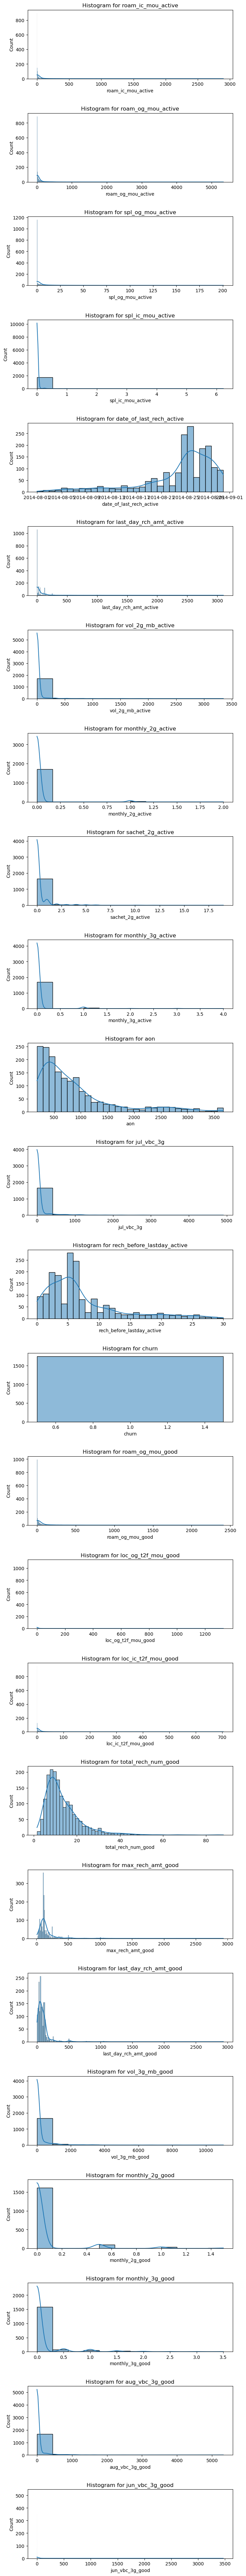

In [41]:
fig, axes = plt.subplots(nrows=len(hv_churn.columns), figsize=(8, 4 * len(hv_churn.columns)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(hv_churn.columns):
    sns.histplot(hv_churn[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

plt.show()

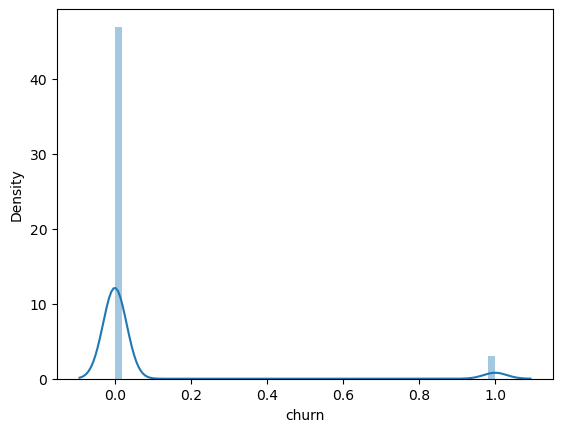

In [42]:
# Distribution of target variable

sns.distplot(hv_df1['churn'])
plt.show()

In [43]:
churn_counts = hv_df1['churn'].value_counts()

# Calculate the percentage of 1s and 0s
percentage_1 = (churn_counts[1] / len(hv_df1['churn'])) * 100
percentage_0 = (churn_counts[0] / len(hv_df1['churn'])) * 100

print(f"Percentage of 'churn' equal to 1: {percentage_1:.2f}%")
print(f"Percentage of 'churn' equal to 0: {percentage_0:.2f}%")

Percentage of 'churn' equal to 1: 6.15%
Percentage of 'churn' equal to 0: 93.85%


In [ ]:
# There ia very high imbalance in Target variable

In [44]:
hv_df1_numeric = hv_df1._get_numeric_data()

In [45]:
percentiles = [95, 97.5, 99, 99.5, 99.9]
custom_percentiles = hv_df1_numeric.quantile([p/100 for p in percentiles] + [1])
print(custom_percentiles)

       roam_ic_mou_active  roam_og_mou_active  spl_og_mou_active  \
0.950            66.46600           120.20200            30.9300   
0.975           139.50300           231.51450            46.3230   
0.990           292.44920           449.50280            75.2952   
0.995           422.57260           654.24350           115.7279   
0.999           949.88286          1375.82392           300.8036   
1.000          4169.81000          5337.04000          1390.8800   

       spl_ic_mou_active  last_day_rch_amt_active  vol_2g_mb_active  \
0.950               0.25                    252.0         428.85300   
0.975               0.46                    400.0         747.18800   
0.990               0.61                    565.0        1279.14940   
0.995               0.75                    899.0        1729.72890   
0.999               0.96                   1098.0        2819.57064   
1.000               6.23                   4449.0       11117.61000   

       monthly_2g_active 

In [ ]:
# there are some outliers in the data and it can be handled by capping at 99.9% threshold 

In [46]:
percentile_threshold = 0.999

# Calculate 99.9th percentile for each column
percentile_values = hv_df1_numeric.quantile(percentile_threshold)

# Cap values at the 99.9th percentile
hv_df1_numeric_cap = hv_df1_numeric.clip(upper=percentile_values, axis=1)

# Display the capped DataFrame
print(hv_df1_numeric_cap.shape)

(28455, 24)


In [47]:
y = hv_df1_numeric_cap['churn']

X = hv_df1_numeric_cap.drop('churn', axis=1)

print(X.shape)
print(y.shape)


(28455, 23)
(28455,)


In [48]:
from sklearn.preprocessing import StandardScaler

numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=numeric_columns)
print(X_scaled.shape)

(28455, 23)


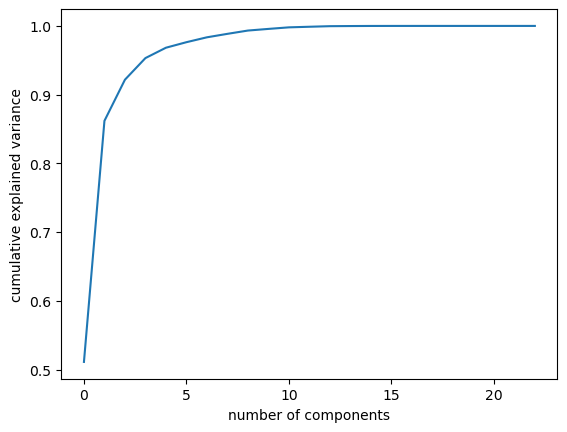

In [49]:
# Apply PCA on the Sampled data 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [50]:
#99% of variance is explained by 11 components

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X.shape)



(28455, 23)


# Handling High Imbalance

In [53]:
# Apply SMOTE to handle high imbalance data
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import statsmodels.api as sm
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_resampled = sm.add_constant(X_resampled)
print(X_resampled.shape)
print(y_resampled.shape)

(37338, 24)
(37338,)


# Model 1 Logistic regression

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

num_features_to_keep = 10 
rfe = RFE(model, n_features_to_select=num_features_to_keep)

X_resampled_rfe = rfe.fit_transform(X_resampled, y_resampled)

selected_features = X_resampled.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['const', 'spl_og_mou_active', 'spl_ic_mou_active', 'monthly_2g_active',
       'sachet_2g_active', 'monthly_3g_active', 'rech_before_lastday_active',
       'loc_og_t2f_mou_good', 'total_rech_num_good', 'monthly_2g_good'],
      dtype='object')


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_resampled_rfe, y_resampled, test_size=0.3, random_state=42)

logreg_model_rfe = LogisticRegression()
logreg_model_rfe.fit(X_train_rfe, y_train_rfe)

y_pred_rfe = logreg_model_rfe.predict(X_test_rfe)

print("Classification Report:\n", classification_report(y_test_rfe, y_pred_rfe))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rfe, y_pred_rfe))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.75      5624
           1       0.73      0.85      0.78      5578

    accuracy                           0.77     11202
   macro avg       0.77      0.77      0.77     11202
weighted avg       0.77      0.77      0.77     11202


Confusion Matrix:
 [[3850 1774]
 [ 839 4739]]


In [56]:
logm2 = sm.GLM(y_resampled, X_resampled, family=sm.families.Binomial())
res = logm2.fit()

y_train_pred = res.predict(sm.add_constant(X_train)).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

print(y_train_pred_final.head())

   Churn  Churn_Prob  predicted
0      1    0.882513          1
1      0    0.037875          0
2      0    0.992762          1
3      0    0.020377          0
4      0    0.150944          0


In [57]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14844  3825]
 [  242  1007]]

Accuracy : 0.7958128326137163


In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_selected_features = pd.DataFrame()
vif_selected_features['Features'] = selected_features
vif_selected_features['VIF'] = [variance_inflation_factor(X_resampled[selected_features].values, i) for i in range(len(selected_features))]
vif_selected_features['VIF'] = round(vif_selected_features['VIF'], 2)
vif_selected_features = vif_selected_features.sort_values(by="VIF", ascending=False)

print("VIF for Selected Features:")
print(vif_selected_features)


VIF for Selected Features:
                     Features   VIF
0                       const  5.87
3           monthly_2g_active  1.50
9             monthly_2g_good  1.50
8         total_rech_num_good  1.09
6  rech_before_lastday_active  1.06
4            sachet_2g_active  1.05
7         loc_og_t2f_mou_good  1.04
1           spl_og_mou_active  1.03
2           spl_ic_mou_active  1.02
5           monthly_3g_active  1.02


In [59]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# True Positive Rate (Sensitivity, Recall)
tpr = TP / float(TP + FN)
print(f"True Positive Rate (Sensitivity, Recall): {tpr}")

# True Negative Rate (Specificity)
tnr = TN / float(TN + FP)
print(f"True Negative Rate (Specificity): {tnr}")

# False Positive Rate (Fall-Out)
fpr = FP / float(TN + FP)
print(f"False Positive Rate (Fall-Out): {fpr}")

# Precision (Positive Predictive Value)
precision = TP / float(TP + FP)
print(f"Precision (Positive Predictive Value): {precision}")

# Negative Predictive Value
npv = TN / float(TN + FN)
print(f"Negative Predictive Value: {npv}")

True Positive Rate (Sensitivity, Recall): 0.8062449959967974
True Negative Rate (Specificity): 0.7951148963522416
False Positive Rate (Fall-Out): 0.2048851036477583
Precision (Positive Predictive Value): 0.2084023178807947
Negative Predictive Value: 0.9839586371470237


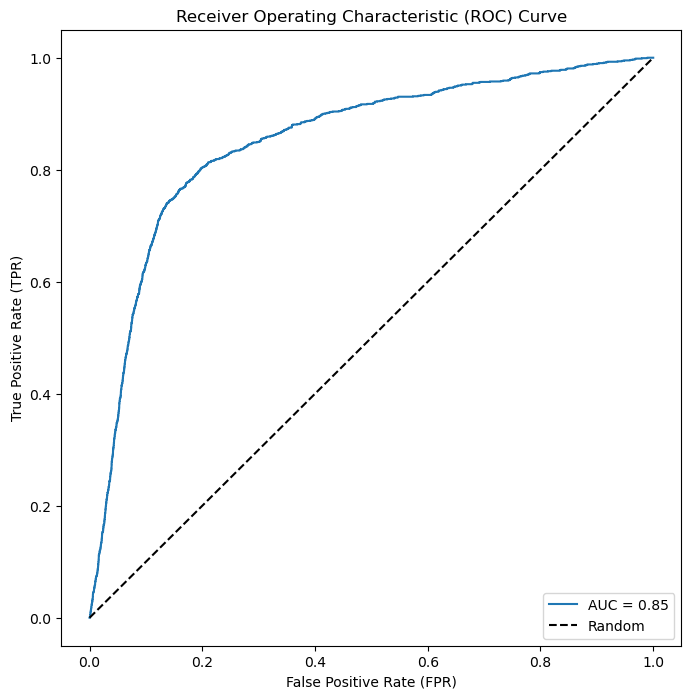

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

# Calculate AUC score
roc_auc = roc_auc_score(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model 2 - Random Forest

In [62]:
y_rf = hv_df1_numeric_cap['churn']

X_rf = hv_df1_numeric_cap.drop('churn', axis=1)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_rf, y_train_rf)

y_test_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test_rf, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_rf, y_test_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_rf))


Accuracy: 0.944476982546562

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8037
           1       0.57      0.20      0.30       500

    accuracy                           0.94      8537
   macro avg       0.76      0.60      0.63      8537
weighted avg       0.93      0.94      0.93      8537


Confusion Matrix:
 [[7962   75]
 [ 399  101]]


# Model 3 - Random Forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Create a Random Forest model with class_weight='balanced'
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_model_balanced.fit(X_rf_train, y_rf_train)

y_rf_pred = rf_model_balanced.predict(X_rf_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_rf_test, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_rf_test, y_rf_pred))


Accuracy: 0.9454140798875483

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8037
           1       0.59      0.21      0.31       500

    accuracy                           0.95      8537
   macro avg       0.77      0.60      0.64      8537
weighted avg       0.93      0.95      0.93      8537


Confusion Matrix:
 [[7964   73]
 [ 393  107]]


# Model 4 - Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

y_rf = hv_df1_numeric_cap['churn']
X_rf = hv_df1_numeric_cap.drop('churn', axis=1)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_resampled_rf, y_resampled_rf = smote.fit_resample(X_train_rf, y_train_rf)

# Create a Random Forest model with class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

rf_model.fit(X_resampled_rf, y_resampled_rf)

y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the Random Forest model
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      8037
           1       0.44      0.51      0.47       500

    accuracy                           0.93      8537
   macro avg       0.70      0.73      0.72      8537
weighted avg       0.94      0.93      0.94      8537


Confusion Matrix:
 [[7712  325]
 [ 247  253]]


In [66]:
confusion = confusion_matrix(y_test_rf, y_pred_rf)

# Calculate TP, TN, FP, FN
TP = confusion[1, 1]  # true positive
TN = confusion[0, 0]  # true negatives
FP = confusion[0, 1]  # false positives
FN = confusion[1, 0]  # false negatives

# Display the results
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 253
True Negatives (TN): 7712
False Positives (FP): 325
False Negatives (FN): 247


In [67]:
# True Positive Rate (Sensitivity, Recall)
tpr = TP / float(TP + FN)
print(f"True Positive Rate (Sensitivity, Recall): {tpr}")

# True Negative Rate (Specificity)
tnr = TN / float(TN + FP)
print(f"True Negative Rate (Specificity): {tnr}")

# False Positive Rate (Fall-Out)
fpr = FP / float(TN + FP)
print(f"False Positive Rate (Fall-Out): {fpr}")

# Precision (Positive Predictive Value)
precision = TP / float(TP + FP)
print(f"Precision (Positive Predictive Value): {precision}")

# Negative Predictive Value
npv = TN / float(TN + FN)
print(f"Negative Predictive Value: {npv}")

True Positive Rate (Sensitivity, Recall): 0.506
True Negative Rate (Specificity): 0.9595620256314545
False Positive Rate (Fall-Out): 0.04043797436854548
Precision (Positive Predictive Value): 0.43771626297577854
Negative Predictive Value: 0.9689659504962935


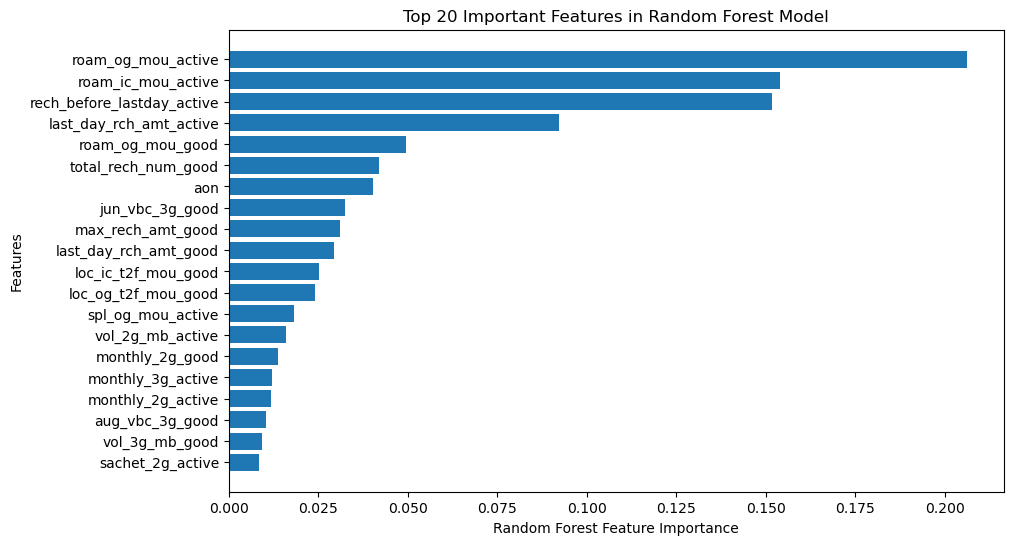

In [68]:
# Plot feature importance
feature_importance = rf_model.feature_importances_
feature_names = X_rf.columns

# Sort the features based on importance
sorted_idx = feature_importance.argsort()

# Plot the 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx[-20:])), feature_importance[sorted_idx][-20:])
plt.yticks(range(len(sorted_idx[-20:])), [feature_names[i] for i in sorted_idx[-20:]])
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features in Random Forest Model')
plt.show()

# Logistic regression model perform better than Random forest since it captures the Churn customer data better


#### Churn rate is low in customers with longer tenure or age on network
#### Churn rate is low as frequency of recharge in active month increases
#### Churn rate is low as frequency of total recharge in good month increases
#### Customers who tend to churn recharges with amt less than 200 on last recharge